In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.applications.resnet50 import ResNet50

In [2]:
# Cek current working directory
current_path = os.getcwd()
print("Current working directory:", current_path)

Current working directory: D:\Kuliah\Semester 7 (Bangkit & BRIN)\Bangkit\Capstone Project\Capstone_Bangkit


In [3]:
import zipfile

zip_file = 'makanan.zip'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('makanan')

In [4]:
path = 'D:\Kuliah\Semester 7 (Bangkit & BRIN)\Bangkit\Capstone Project\Capstone_Bangkit\makanan\makanan'

image_size = (224, 224)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 7829 files belonging to 46 classes.
Using 6264 files for training.
Using 1565 files for validation.


In [5]:
input_shape = (224, 224, 3)  # Ubah sesuai kebutuhan
num_classes = len(train_ds.class_names)
print("Jumlah kelas:", num_classes)

# Convert labels to one-hot encoded format
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, num_classes)))

Jumlah kelas: 46


In [6]:
def model(input_shape, num_classes):
    base_model = keras.applications.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
    )

    for layer in base_model.layers:
        layer.trainable = False  # Freeze layers from ResNet50

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    units = num_classes
    activation = 'softmax'

    outputs = layers.Dense(units, activation=activation)(x)
    model = keras.Model(inputs=base_model.input, outputs=outputs)

    return model

model = model(input_shape, num_classes)
model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [7]:
epochs = 10

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras", monitor='val_ds', save_best_only=True),
]

model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=[keras.metrics.CategoricalAccuracy(name="acc")],
)

model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/10

49/49 [==============================] - 1981s 39s/step - loss: 1.7740 - acc: 0.5489 - val_loss: 0.5363 - val_acc: 0.8735
Epoch 2/10
49/49 [==============================] - 1808s 37s/step - loss: 0.5580 - acc: 0.8458 - val_loss: 0.3516 - val_acc: 0.9029
Epoch 3/10
49/49 [==============================] - 1900s 38s/step - loss: 0.3658 - acc: 0.8956 - val_loss: 0.2994 - val_acc: 0.9144
Epoch 4/10
49/49 [==============================] - 1718s 35s/step - loss: 0.2574 - acc: 0.9262 - val_loss: 0.2673 - val_acc: 0.9233
Epoch 5/10
49/49 [==============================] - 1924s 39s/step - loss: 0.2011 - acc: 0.9460 - val_loss: 0.2481 - val_acc: 0.9291
Epoch 6/10
49/49 [==============================] - 1720s 35s/step - loss: 0.1523 - acc: 0.9595 - val_loss: 0.2434 - val_acc: 0.9304
Epoch 7/10
49/49 [==============================] - 1581s 32s/step - loss: 0.1209 - acc: 0.9682 - val_loss: 0.2376 - val_acc: 0.9272
Epoch 8/10
49/49 [==============================] - 1546s 31s/step -

In [27]:
# saving model (jangan lupa didownload nanti di files)
model.save('D:\Kuliah\Semester 7 (Bangkit & BRIN)\Bangkit\Capstone Project\Capstone_Bangkit\coba4.h5')

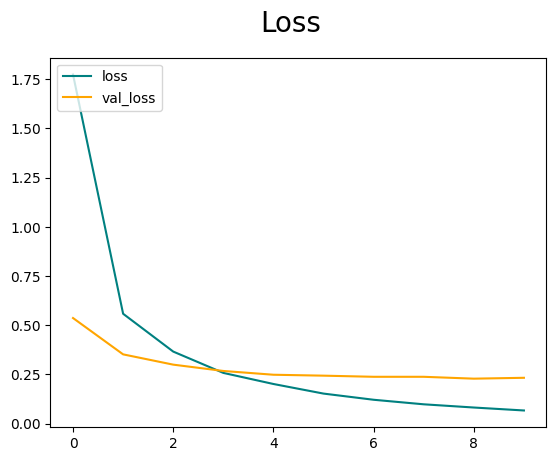

In [15]:
fig = plt.figure()
plt.plot(model.history.history['loss'], color='teal', label='loss')
plt.plot(model.history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

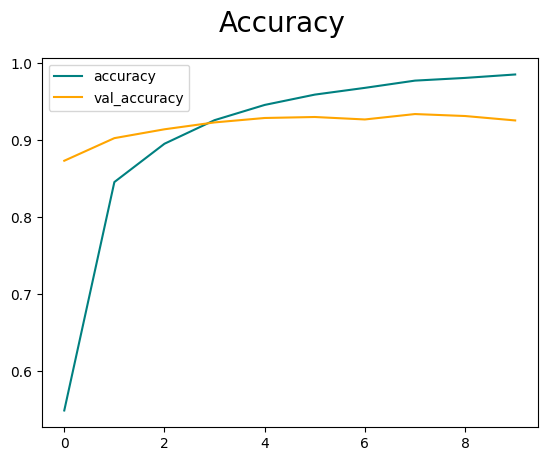

In [18]:
fig = plt.figure()
plt.plot(model.history.history['acc'], color='teal', label='accuracy')
plt.plot(model.history.history['val_acc'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [23]:
import tensorflow.image as tfi
from tensorflow.keras.utils import load_img, img_to_array

# Upload gambar dan sesuaikan direktori lokasi gambar di bawah ini

img_path = r'D:\Kuliah\Semester 7 (Bangkit & BRIN)\Bangkit\Capstone Project\Capstone_Bangkit\makanan\makanan\burger\Burger-Test (14).jpeg'

# load Image
image = load_img(img_path)

# Convert to an array
image = img_to_array(image)

# Resize the image
image = tfi.resize(image, (224, 224))

# Convert to Tensor of 32Bit - Float
image = tf.cast(image, tf.float32)

# Normalize the image
image = image/255.

model.predict(tf.expand_dims(image, axis=0))

1/1 [==============================] - 2s 2s/step


array([[8.4754825e-03, 2.8430197e-01, 2.6129363e-03, 6.6947547e-04,
        3.5191579e-03, 7.7547595e-02, 8.5474038e-03, 1.6530560e-03,
        1.2928799e-03, 4.2007229e-04, 1.4711000e-03, 2.4666600e-03,
        4.7979061e-04, 3.2206464e-03, 7.9238984e-05, 2.7687582e-01,
        3.0720884e-03, 5.8920245e-04, 3.7112307e-02, 8.8936166e-04,
        1.7396009e-03, 1.1352454e-01, 2.0779991e-03, 1.0213448e-03,
        5.2798218e-03, 5.3962760e-02, 4.5345291e-03, 9.2300959e-03,
        1.7759580e-03, 6.7141795e-05, 1.5531806e-03, 1.2220452e-03,
        5.3342357e-03, 9.8099578e-03, 3.6126643e-04, 1.1408506e-03,
        7.4870624e-03, 1.2614179e-04, 4.8775403e-03, 1.9490569e-03,
        5.3791098e-02, 5.2429427e-04, 5.9222110e-04, 1.6908697e-03,
        6.4224389e-04, 3.8795112e-04]], dtype=float32)